In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2341, 141), (586, 141), (2341, 1), (586, 1))

# Linear regression

In [50]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                       y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                      y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                                       y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                                      y_pred=np.exp(test_pre)))))

Train MSE: 418248634.460
Test MSE: 450414235.010
Train R^2: 0.930
Test R^2: 0.944


Text(0, 0.5, 'Sale_Price')

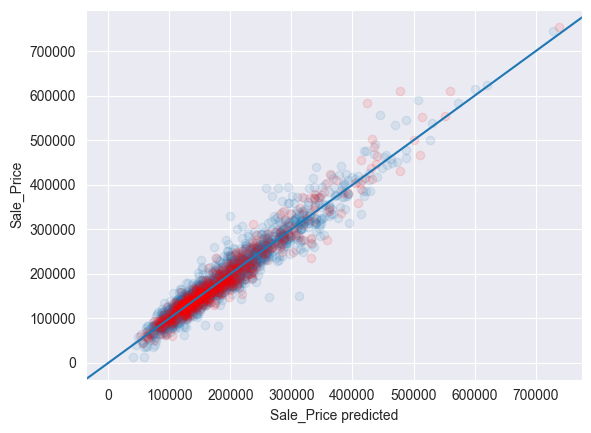

In [51]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

# Polynomial lr

In [52]:
# make pipeline: create features, then feed them to linear_reg model
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, Y_train)

test_pre = model.predict(X_test)
train_pre = model.predict(X_train)

print("Train Error degree {:d}: {:.3f}".format(degree, (mean_squared_error(y_true=np.exp(Y_train),
                                                                           y_pred=np.exp(train_pre)))))

print("Test Error degree {:d}: {:.3f}".format(degree, (mean_squared_error(y_true=np.exp(Y_test),
                                                                          y_pred=np.exp(test_pre)))))

Train Error degree 2: 0.391
Test Error degree 2: 133469037388164866662599594884022066263958702767436198542637427880749315082499496944983862050842833489884826805540681490492662078107153149739939901985996503673063278379110082295039015510766505920254839062486098688158491213824.000


overfitting!

# Kfold

In [53]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

lr = LinearRegression()
train_pre = cross_val_predict(lr, X_train, Y_train, cv=kf)
test_pre = cross_val_predict(lr, X_test, Y_test, cv=kf)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                       y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                      y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train Error: 498646293.971
Test Error: 498165696.363
Train R^2: 0.916
Test R^2: 0.938


Text(0, 0.5, 'Sale_Price')

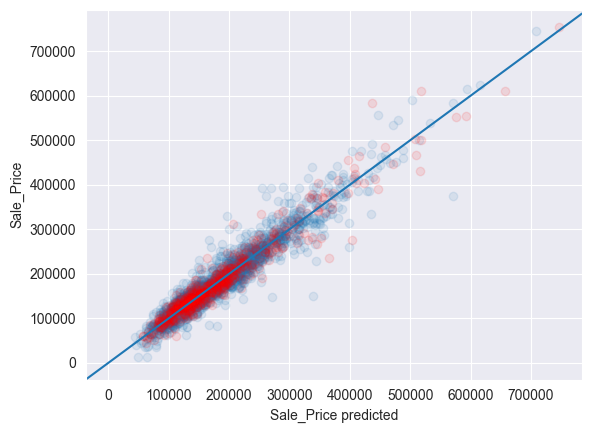

In [54]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')